In [30]:
'''
Project details:-

In this project we have login to the XCAL(http://3.23.185.172/X_AUTO/) and than move to its relative tab(http://3.23.185.172:9999/X_AUTO/).
We are taking the input from user which contain the Market/Cluster and cycle number details. After that We filter in the XCAL window according to the input from users.
After that we need to download the logs in which scenerio is "C3". Download them save it to the folder naming same to cluster name
In This project two conditions are satisfied:-

1) If Logs are less than 5, than than it directly download in your Laptop.You need to move them to the folder with its cluster name.
2)If logs are greater than 5, than When we click on download it would create compressed list and than we need to click on compressed tab and download the logs. After downloading it should be move to its folder.

'''

'\nProject details:-\n\nIn this project we have login to the XCAL(http://3.23.185.172/X_AUTO/) and than move to its relative tab(http://3.23.185.172:9999/X_AUTO/).\nWe are taking the input from user which contain the Market/Cluster and cycle number details. After that We filter in the XCAL window according to the input from users.\nAfter that we need to download the logs in which scenerio is "C3". Download them save it to the folder naming same to cluster name\nIn This project two conditions are satisfied:-\n\n1) If Logs are less than 5, than than it directly download in your Laptop.You need to move them to the folder with its cluster name.\n2)If logs are greater than 5, than When we click on download it would create compressed list and than we need to click on compressed tab and download the logs. After downloading it should be move to its folder.\n\n'

In [31]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import glob, os
import shutil
from zipfile import ZipFile
from pathlib import Path

os.chdir("/Users/Desktop/X_CAL")

In [32]:
files="/Users/Desktop/X_CAL/Data_XCal.xlsx"

In [53]:
df = pd.read_excel('/Users/Desktop/X_CAL/Data_XCal.xlsx')
df.head(15)

,AOI,Cluster,cycle_pre
0,ZZZZ,ZOZ-01,34567894
1,ZZZZ,ZOZ-02,13456774
2,ZZZZ,ZOZ-03,34556677
3,ZZZZ,ZOZ-06,15678909
4,ZZZZ,ZOZ-08,11140323


In [34]:
df[['clus','Number']] = df["Cluster"].str.split("-", n = 1, expand = True)

In [35]:
df["cycle_pre"]=df["cycle_pre"].astype(str)
add_C=lambda x:"[ALL] Pre C"+x
df["cycle_pre"]=df["cycle_pre"].apply(add_C)


In [36]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
import threading
import os,time,csv,datetime
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver import Chrome, ChromeOptions

a = webdriver.Chrome()
a.get("http://0.00.000.000/x_auto/")

In [37]:



p = a.current_window_handle

a.implicitly_wait(15)

user = a.find_element(By.XPATH, '//*[@id="testBody"]/div/div/div/div[1]/div/div[1]/div/input')
user.send_keys('fffffff')


user1 = a.find_element(By.XPATH, '//*[@id="logInPassword"]')
user1.send_keys('zzzzzzz')


user2 = a.find_element(By.XPATH, '/html/body/div/div/div/div[2]/button[1]')
user2.click()

a.implicitly_wait(15)

user3 = a.find_element(By.XPATH, '//*[@id="iconMenuBar"]/div/div[7]/div/div/span')
user3.click()


user4 = a.find_element(By.XPATH, '/html/body/div[1]/div/div[2]/div[5]/div/div/div[2]/div')
user4.click()

In [38]:
time.sleep(2)
chwd = a.window_handles
chwd

for w in chwd:
    if(w!=p):
        a.switch_to.window(w)
    else:
        pass
    
time.sleep(0.9)

a.find_element(By.XPATH, '//*[@id="app"]/div/div[3]/div[3]/div/div[3]/div/div[1]/div/div[1]/button').click()


In [39]:
AOI=df[["AOI"]]
marktname=df.iat[0,0]


In [40]:
if marktname=="XXXX":
    i="1"
if marktname=="AAAA":
    i="2"
if marktname=="YYYY":    
    i='3'
if marktname=="ZZZZ":
    i='4'

if marktname=="CVBNN":
    i='5'
if marktname=="DFGHH":
    i='6'
if marktname=="WERGG":
    i='7'
    
if marktname=="XFGHJ":    
    i='8'

else:
    pass

In [42]:

time.sleep(5)
mar_path="(//table[@class='k-grid-table'])[14]/tbody/tr["+ i +"]/td"
a.find_element(By.XPATH,mar_path).click()
time.sleep(5)
a.find_element(By.XPATH, "//div[@class='k-widget k-window briefView-kw-index']//div[@class='k-window-content']//div//button[@type='button'][normalize-space()='OK']").click()




In [43]:
df["cycle_pre"]=df["cycle_pre"].astype(str)


In [44]:
mylist = df['Cluster'].tolist()

In [45]:
cluster_name=df.iat[0,1]


In [46]:
for x in range(len(mylist)):
    try:

        Number1=df.iat[x,4]
        Cycle1=df.iat[x,2]
        cluster_name=df.iat[x,1]
        #time.sleep(2)
        #a.find_element(By.XPATH,"(//div[@class='k-grid-container'])[3]//td[@class='briefView-c-nomal']").click()
        time.sleep(2)
        a.find_element(By.XPATH,"//body[1]/div[1]/div[1]/div[3]/div[3]/div[1]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/div[2]/div[2]/div[1]/div[1]/table[1]/tbody[1]/tr["+ Number1 +"]").click()
        time.sleep(2)
        a.find_element(By.XPATH,"/html/body/div[1]/div/div[3]/div[3]/div/div[3]/div/div[3]/div/div[2]/div/div[2]/div/div[1]/table/tbody/tr[1]/td[1]").click()
        time.sleep(2)
        a.find_element(By.XPATH,"(//div[@class='k-grid-container'])[5]//td[normalize-space()='"+Cycle1+"']").click()


        ele=a.find_element(By.XPATH,"(//div[@class='k-grid-container'])[5]//td[normalize-space()='"+Cycle1+"']")
        action = ActionChains(a)
        action.double_click(ele)
        action.perform()

        sese=a.find_elements(By.XPATH,"(//div[@class='k-grid-container'])[6]//tbody//tr")

        if (len(sese)>5):
            #a.find_element(By.XPATH,"/html/body/div[1]/div/div[3]/div[5]/div/div[5]/div[1]/div[2]/div/div[1]/table/tbody/tr[6]/td[5]").click()
            a.find_element(By.XPATH,"(//div[@class='k-pane k-scrollable'])[9]//div//button[@type='button'][text()='Filter']").click()
            time.sleep(2)
            drdr= a.find_element(By.XPATH,"/html/body/div[17]/div[2]/div/div[1]/div[3]/span/span/span[1]")
            action.click_and_hold(drdr).perform()

            time.sleep(2)
            a.find_element(By.XPATH,"//body/div[@class='k-widget k-window briefView-kw-index']/div[@class='k-window-content']/div/div/div[3]/span[1]/span[1]").send_keys('C3')

            a.find_element(By.XPATH,"/html/body/div[17]/div[2]/div/div[1]/div[2]/span/span/span[1]").click()
            time.sleep(3)
            a.find_element(By.XPATH,"//div[@class='k-widget k-window briefView-kw-index']//div[@class='k-window-content']//div//button[@type='button'][normalize-space()='Apply']").click()
            time.sleep(2)  

            a.find_element(By.XPATH,"//div[@role='group']//div//div[1]//div[1]//div[1]//table[1]//thead[1]//tr[1]//th[1]//input[1]").click()
            time.sleep(5)
            a.find_element(By.XPATH,"/html/body/div[1]/div/div[3]/div[5]/div/div[4]/button[3]").click()

            time.sleep(8)
            a.find_element(By.XPATH,"//div[@class='el-message-box__wrapper']//span[normalize-space()='OK']").click()
            time.sleep(5)
            a.find_element(By.XPATH,"//span[normalize-space()='OK']").click()
            webdriver.ActionChains(a).send_keys(Keys.ESCAPE).perform()
         
           

        else:
            a.find_element(By.XPATH,"(//div[@class='k-pane k-scrollable'])[9]//div//button[@type='button'][text()='Filter']").click()
            time.sleep(2)
            drdr= a.find_element(By.XPATH,"/html/body/div[17]/div[2]/div/div[1]/div[3]/span/span/span[1]")
            action.click_and_hold(drdr).perform()
            time.sleep(2)
            a.find_element(By.XPATH,"//body/div[@class='k-widget k-window briefView-kw-index']/div[@class='k-window-content']/div/div/div[3]/span[1]/span[1]").send_keys('C3')

            a.find_element(By.XPATH,"/html/body/div[17]/div[2]/div/div[1]/div[2]/span/span/span[1]").click()
            time.sleep(3)
            a.find_element(By.XPATH,"//div[@class='k-widget k-window briefView-kw-index']//div[@class='k-window-content']//div//button[@type='button'][normalize-space()='Apply']").click()
            time.sleep(2)  

            a.find_element(By.XPATH,"//div[@role='group']//div//div[1]//div[1]//div[1]//table[1]//thead[1]//tr[1]//th[1]//input[1]").click()
            a.find_element(By.XPATH,"/html/body/div[1]/div/div[3]/div[5]/div/div[4]/button[3]").click()

            time.sleep(30)
            list_of_files = glob.glob('/Users/Downloads/*') # * means all if need specific format then *.csv
            latest_file = max(list_of_files, key=os.path.getctime)
            latestfile=latest_file
            latestfile2="/"+latest_file

            parent_dir = '/Users/Desktop/X_CAL'
            onee= '/Users/Desktop/X_CAL'
            filen="/Users/Desktop/X_CAL/"+cluster_name+latestfile

            path1 = os.path.join(onee, cluster_name)

            dirpath = Path(path1) / path1
            if dirpath.exists() and dirpath.is_dir():
                shutil.rmtree(dirpath)


            os.makedirs(path1)
            shutil.move(latestfile, path1)
            
            webdriver.ActionChains(a).send_keys(Keys.ESCAPE).perform()
            
    except:
        print(a)



In [47]:
for x in range(len(mylist)):

    try:
        Number1=df.iat[x,4]
        Cycle1=df.iat[x,2]
        cluster_name=df.iat[x,1]
        time.sleep(2)
        a.find_element(By.XPATH,"//body[1]/div[1]/div[1]/div[3]/div[3]/div[1]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/div[2]/div[2]/div[1]/div[1]/table[1]/tbody[1]/tr[1]").click()
        time.sleep(2)
        a.find_element(By.XPATH,"//body[1]/div[1]/div[1]/div[3]/div[3]/div[1]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/div[2]/div[2]/div[1]/div[1]/table[1]/tbody[1]/tr["+ Number1 +"]").click()
        time.sleep(2)
        a.find_element(By.XPATH,"/html/body/div[1]/div/div[3]/div[3]/div/div[3]/div/div[3]/div/div[2]/div/div[2]/div/div[1]/table/tbody/tr[1]/td[1]").click()
        time.sleep(2)
        a.find_element(By.XPATH,"(//div[@class='k-grid-container'])[5]//td[normalize-space()='"+Cycle1+"']").click()


        ele=a.find_element(By.XPATH,"(//div[@class='k-grid-container'])[5]//td[normalize-space()='"+Cycle1+"']")
        action = ActionChains(a)
        action.double_click(ele)
        action.perform()

        time.sleep(15)
        sese=a.find_elements(By.XPATH,"(//div[@class='k-grid-container'])[6]//tbody//tr")
        sese2=(len(sese)>5)

        print(len(sese))

        if (len(sese)>5):

            a.find_element(By.XPATH,"/html/body/div[1]/div/div[3]/div[5]/div/div[5]/div[1]/div[1]/div/table/thead/tr/th[1]/input").click()

            time.sleep(2)
            a.find_element(By.XPATH,"//button[normalize-space()='Compressed List']").click()
            time.sleep(5)
            a.find_element(By.XPATH,"(//div[@class='report-region-search-d-bottom'])[15]//button[@class='k-button briefView-kb-window'][text()='Close']").click()

            a.find_element(By.XPATH,"//button[normalize-space()='Compressed List']").click()

            time.sleep(2)

            downpar=a.find_element(By.XPATH,"(//div[@class='k-grid-container'])[23]//button[@class='k-button briefView-kg-small-font'][normalize-space()='Down']").size
            time.sleep(10)



            a.find_element(By.XPATH,"(//div[@class='k-grid-container'])[23]//button[@class='k-button briefView-kg-small-font'][normalize-space()='Down']").click()
            time.sleep(2)

            a.find_element(By.XPATH,"(//div[@class='report-region-search-d-bottom'])[15]//button[@class='k-button briefView-kb-window'][text()='Close']").click()
            time.sleep(30)
            list_of_files = glob.glob('/Users/Downloads/*') 
            latest_file = max(list_of_files, key=os.path.getctime)
            latestfile=latest_file
            latestfile2="/"+latest_file

            parent_dir = '/Users/Desktop/X_CAL'
            onee= '/Users/Desktop/X_CAL'
            filen="/Users/Desktop/X_CAL/"+cluster_name+latestfile

            path1 = os.path.join(onee, cluster_name)

            dirpath = Path(path1) / path1
            if dirpath.exists() and dirpath.is_dir():
                shutil.rmtree(dirpath)


            os.makedirs(path1)
            shutil.move(latestfile, path1)
            
            
            webdriver.ActionChains(a).send_keys(Keys.ESCAPE).perform()
        else:
            print("a")

    except :
        print("out of time ")
   
        



40
5
a
60
20
90


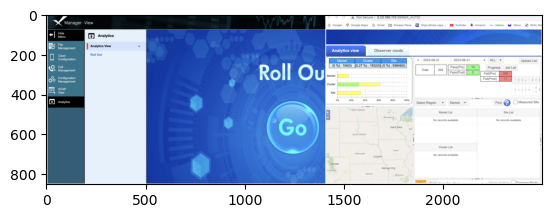

In [48]:

#In this project we have login to the XCAL(http://3.23.185.172/X_AUTO/) and than move to its relative tab(http://3.23.185.172:9999/X_AUTO/).

from matplotlib import image as img
from matplotlib import pyplot as plt
image = img.imread("Login to XCAL and move to another Tab via XCAL.png")
plt.imshow(image)

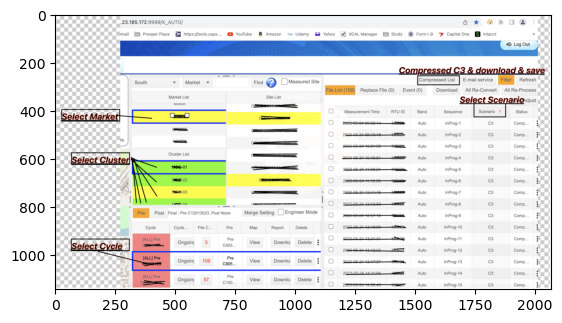

In [49]:
#We are taking the input from user which contain the Market/Cluster and cycle number details. After that We filter in the XCAL window according to the input from users.

image = img.imread("Search According to requisite.png")
plt.imshow(image)

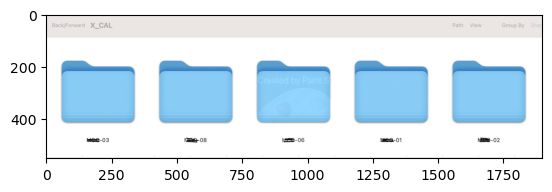

In [50]:
#After that we need to download the logs in which scenerio is "C3". Download them save oit to the folder naming same to cluster name
#Folder created in X-CAL folder for each cluster.
image1 = img.imread("Folder for eac cluster creted in X-CAL folder.png")
plt.imshow(image1)


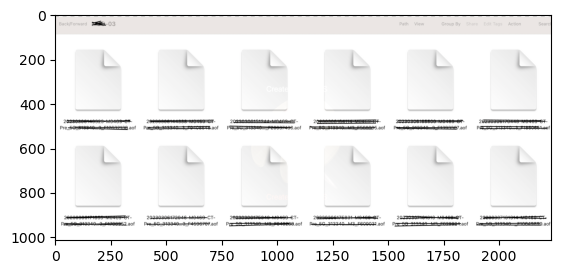

In [51]:
#Logs present in its folder.
image2 = img.imread("Downloaded aof file present in its cluster folder.png")
plt.imshow(image2)